# ทำการปรับแก้ dealias แบบ region_base ไ่ม่ได้ใช้ texture เหมือนของเวิร์คชอร์ป
* ไม่ได้ใช้ texture เหมือน https://github.com/openradar/AMS-Short-Course-on-Open-Source-Radar-Software/blob/master/6_Texture_and_Dealiasing.ipynb
* SingleDop from จากลิงก์ https://github.com/nasa/SingleDop/blob/master/notebooks/SingleDop_Demo.ipynb

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os
import glob
import pyart;
import singledop
import cartopy.crs as ccrs
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead
C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\mpl_toolkits\basemap\__init__.py:33: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _matplotlib_version = LooseVersion(_matplotlib_version)
C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\mpl_toolkits\basemap\__init__.py:34: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _mpl_required_version = LooseVersion('0.98')


# พลอตแต่ละเวลา

nyq:  8.38
316 total observations (M)


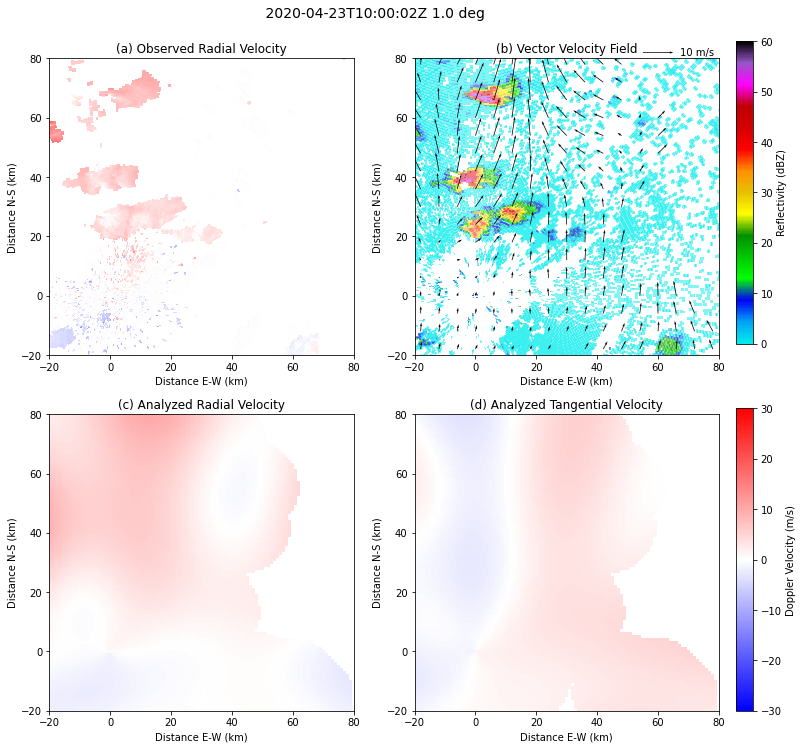

In [34]:
# เวลา 17.00 น. Time 1000UTC
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231000.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณลมด้วย singleDop พร้อมกับกรองข้อมูลด้วยการขจัดค่าการคำนวณได้ที่เกินจริงไปจากค่าตรวจวัดจริง
sd_test = singledop.SingleDoppler2D(L=30.0, radar=radar, range_limits=[0, 100], grid_edge=100.0,
                                    sweep_number=0, name_vr='corrected_velocity',
                                    thin_factor=[4, 12], filter_data=True,
                                    filter_distance=15)

#พลอตแบบพื้นที่ overview
display = singledop.AnalysisDisplay(sd_test)
display.four_panel_plot(scale=100, legend=10, return_flag=False, thin=6, xlim=[-20, 80], ylim=[-20, 80],
                        levels=-30.0+2.0*np.arange(31), name_vr='corrected_velocity', name_dz='corrected_reflectivity',
                        dz_cmap='pyart_NWSRef', dz_limits=[0, 60])


nyq:  8.38
344 total observations (M)


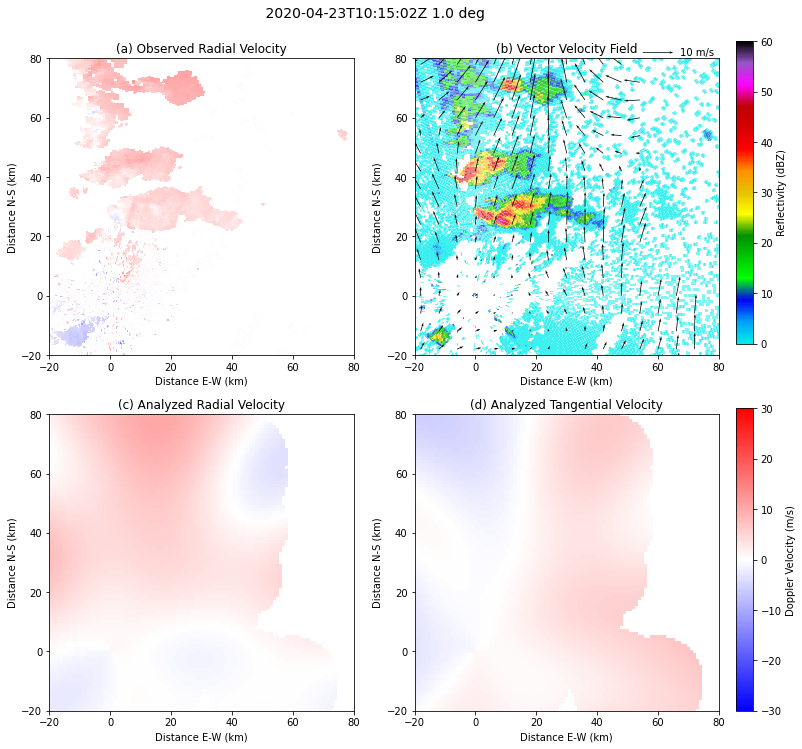

In [35]:
# เวลา 17.15 น. Time 1015UTC
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231015.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณลมด้วย singleDop พร้อมกับกรองข้อมูลด้วยการขจัดค่าการคำนวณได้ที่เกินจริงไปจากค่าตรวจวัดจริง
sd_test = singledop.SingleDoppler2D(L=30.0, radar=radar, range_limits=[0, 100], grid_edge=100.0,
                                    sweep_number=0, name_vr='corrected_velocity',
                                    thin_factor=[4, 12], filter_data=True,
                                    filter_distance=15)

#พลอตแบบพื้นที่ overview
display = singledop.AnalysisDisplay(sd_test)
display.four_panel_plot(scale=100, legend=10, return_flag=False, thin=6, xlim=[-20, 80], ylim=[-20, 80],
                        levels=-30.0+2.0*np.arange(31), name_vr='corrected_velocity', name_dz='corrected_reflectivity',
                        dz_cmap='pyart_NWSRef', dz_limits=[0, 60])


nyq:  8.38
343 total observations (M)


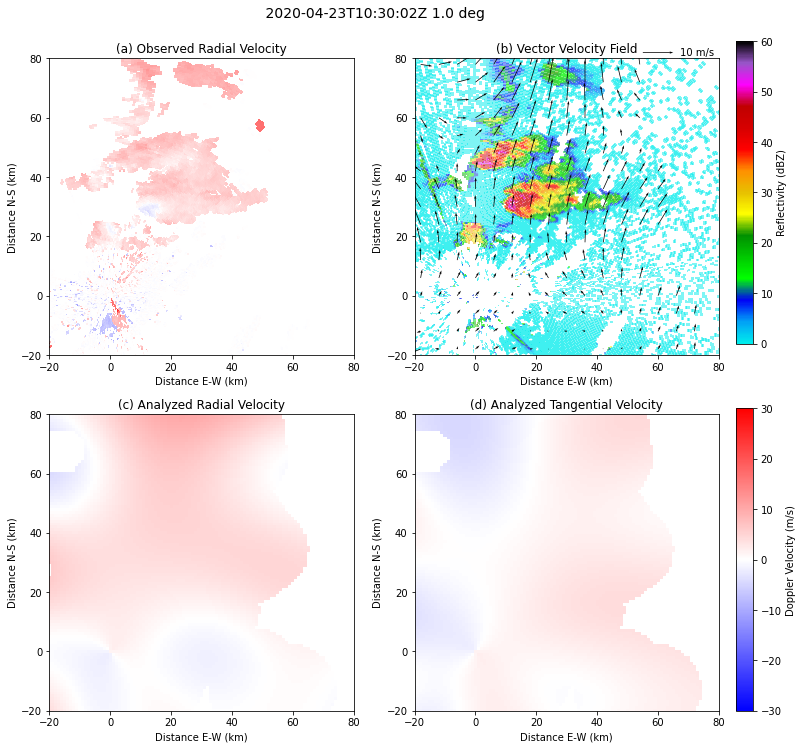

In [36]:
# เวลา 17.30 น. Time 1030UTC
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231030.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณลมด้วย singleDop พร้อมกับกรองข้อมูลด้วยการขจัดค่าการคำนวณได้ที่เกินจริงไปจากค่าตรวจวัดจริง
sd_test = singledop.SingleDoppler2D(L=30.0, radar=radar, range_limits=[0, 100], grid_edge=100.0,
                                    sweep_number=0, name_vr='corrected_velocity',
                                    thin_factor=[4, 12], filter_data=True,
                                    filter_distance=15)

#พลอตแบบพื้นที่ overview
display = singledop.AnalysisDisplay(sd_test)
display.four_panel_plot(scale=100, legend=10, return_flag=False, thin=6, xlim=[-20, 80], ylim=[-20, 80],
                        levels=-30.0+2.0*np.arange(31), name_vr='corrected_velocity', name_dz='corrected_reflectivity',
                        dz_cmap='pyart_NWSRef', dz_limits=[0, 60])


nyq:  8.38
299 total observations (M)


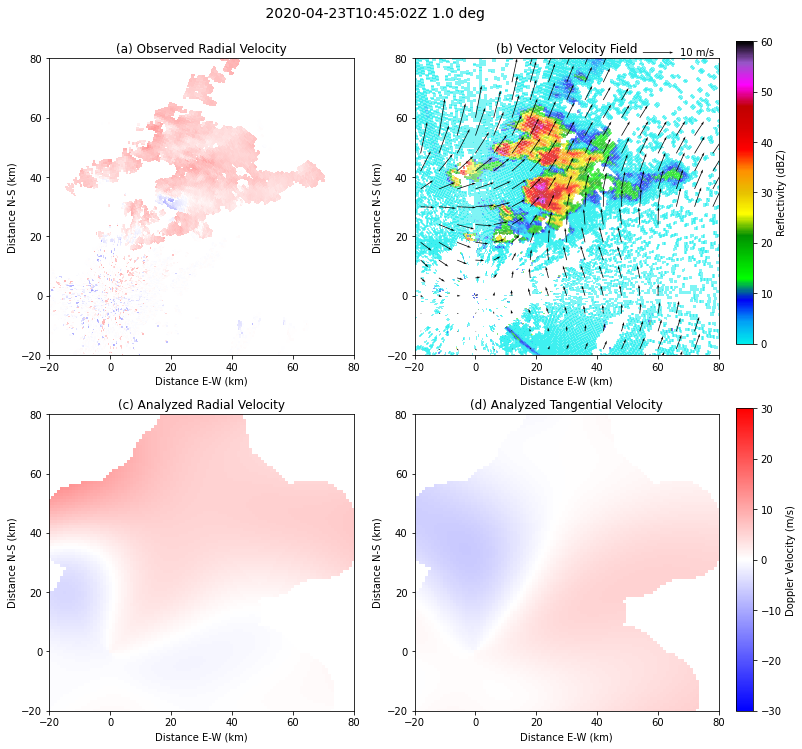

In [37]:
# เวลา 17.45 น. Time 1045UTC
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231045.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณลมด้วย singleDop พร้อมกับกรองข้อมูลด้วยการขจัดค่าการคำนวณได้ที่เกินจริงไปจากค่าตรวจวัดจริง
sd_test = singledop.SingleDoppler2D(L=30.0, radar=radar, range_limits=[0, 100], grid_edge=100.0,
                                    sweep_number=0, name_vr='corrected_velocity',
                                    thin_factor=[4, 12], filter_data=True,
                                    filter_distance=15)

#พลอตแบบพื้นที่ overview
display = singledop.AnalysisDisplay(sd_test)
display.four_panel_plot(scale=100, legend=10, return_flag=False, thin=6, xlim=[-20, 80], ylim=[-20, 80],
                        levels=-30.0+2.0*np.arange(31), name_vr='corrected_velocity', name_dz='corrected_reflectivity',
                        dz_cmap='pyart_NWSRef', dz_limits=[0, 60])


nyq:  8.38
310 total observations (M)


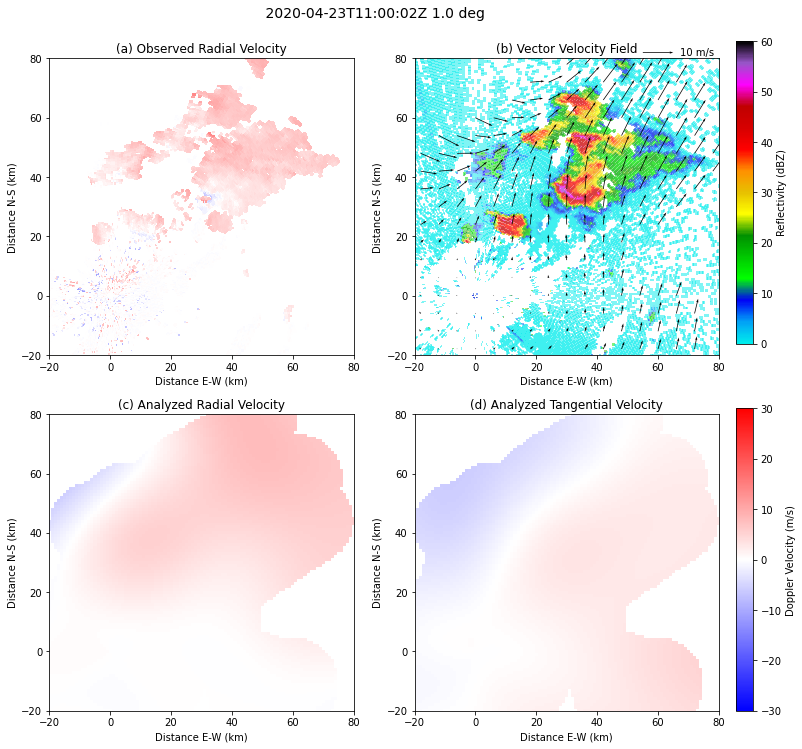

In [38]:
# เวลา 18.00 น. Time 1100UTC
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231100.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณลมด้วย singleDop พร้อมกับกรองข้อมูลด้วยการขจัดค่าการคำนวณได้ที่เกินจริงไปจากค่าตรวจวัดจริง
sd_test = singledop.SingleDoppler2D(L=30.0, radar=radar, range_limits=[0, 100], grid_edge=100.0,
                                    sweep_number=0, name_vr='corrected_velocity',
                                    thin_factor=[4, 12], filter_data=True,
                                    filter_distance=15)

#พลอตแบบพื้นที่ overview
display = singledop.AnalysisDisplay(sd_test)
display.four_panel_plot(scale=100, legend=10, return_flag=False, thin=6, xlim=[-20, 80], ylim=[-20, 80],
                        levels=-30.0+2.0*np.arange(31), name_vr='corrected_velocity', name_dz='corrected_reflectivity',
                        dz_cmap='pyart_NWSRef', dz_limits=[0, 60])


nyq:  8.38
298 total observations (M)


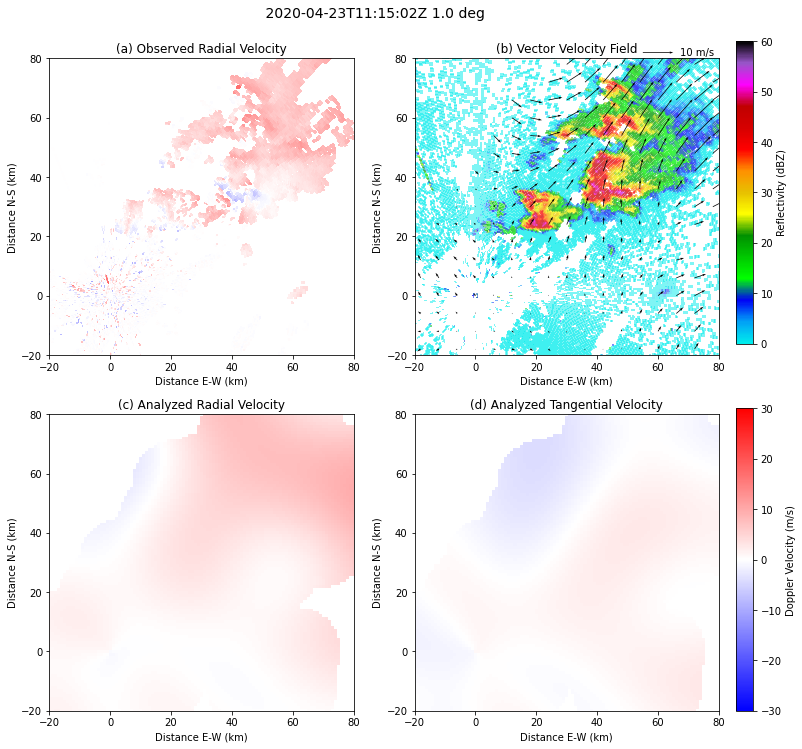

In [39]:
# เวลา 18.15 น. Time 1115UTC
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231115.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณลมด้วย singleDop พร้อมกับกรองข้อมูลด้วยการขจัดค่าการคำนวณได้ที่เกินจริงไปจากค่าตรวจวัดจริง
sd_test = singledop.SingleDoppler2D(L=30.0, radar=radar, range_limits=[0, 100], grid_edge=100.0,
                                    sweep_number=0, name_vr='corrected_velocity',
                                    thin_factor=[4, 12], filter_data=True,
                                    filter_distance=15)

#พลอตแบบพื้นที่ overview
display = singledop.AnalysisDisplay(sd_test)
display.four_panel_plot(scale=100, legend=10, return_flag=False, thin=6, xlim=[-20, 80], ylim=[-20, 80],
                        levels=-30.0+2.0*np.arange(31), name_vr='corrected_velocity', name_dz='corrected_reflectivity',
                        dz_cmap='pyart_NWSRef', dz_limits=[0, 60])


nyq:  8.38
278 total observations (M)


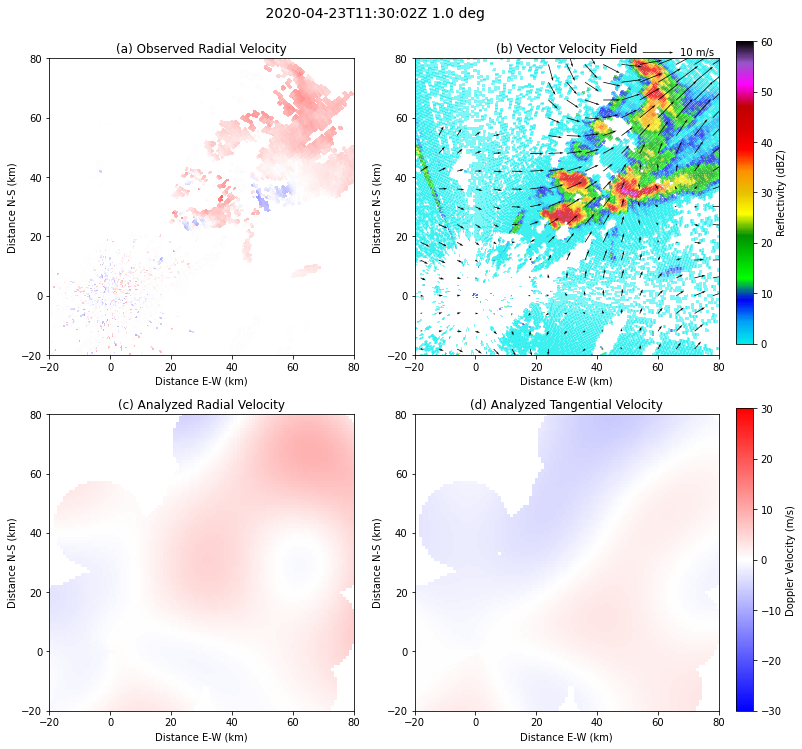

In [40]:
# เวลา 18.30 น. Time 1130UTC
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231130.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณลมด้วย singleDop พร้อมกับกรองข้อมูลด้วยการขจัดค่าการคำนวณได้ที่เกินจริงไปจากค่าตรวจวัดจริง
sd_test = singledop.SingleDoppler2D(L=30.0, radar=radar, range_limits=[0, 100], grid_edge=100.0,
                                    sweep_number=0, name_vr='corrected_velocity',
                                    thin_factor=[4, 12], filter_data=True,
                                    filter_distance=15)

#พลอตแบบพื้นที่ overview
display = singledop.AnalysisDisplay(sd_test)
display.four_panel_plot(scale=100, legend=10, return_flag=False, thin=6, xlim=[-20, 80], ylim=[-20, 80],
                        levels=-30.0+2.0*np.arange(31), name_vr='corrected_velocity', name_dz='corrected_reflectivity',
                        dz_cmap='pyart_NWSRef', dz_limits=[0, 60])


nyq:  8.38
254 total observations (M)


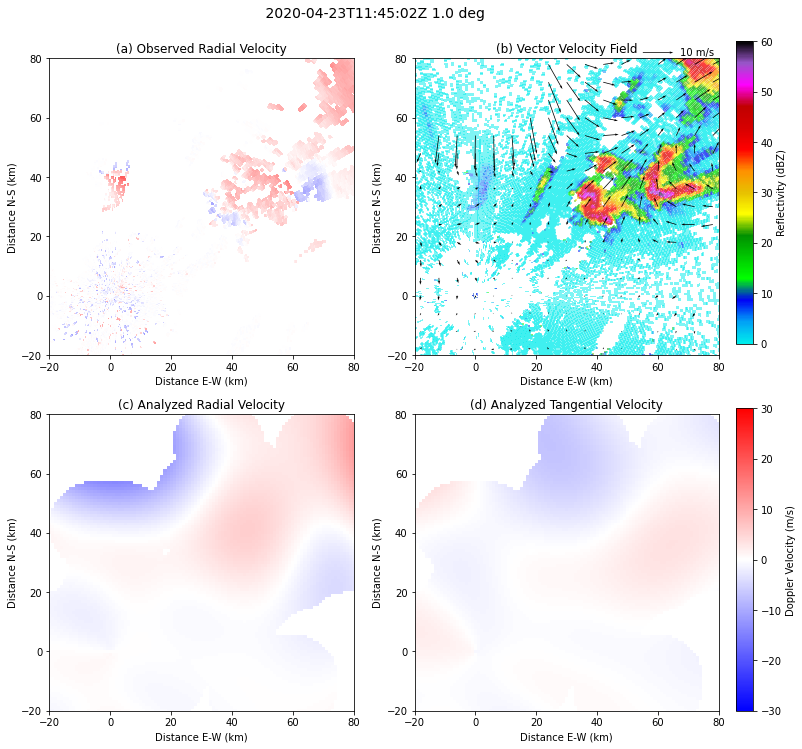

In [41]:
# เวลา 18.45 น. Time 1145UTC
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231145.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณลมด้วย singleDop พร้อมกับกรองข้อมูลด้วยการขจัดค่าการคำนวณได้ที่เกินจริงไปจากค่าตรวจวัดจริง
sd_test = singledop.SingleDoppler2D(L=30.0, radar=radar, range_limits=[0, 100], grid_edge=100.0,
                                    sweep_number=0, name_vr='corrected_velocity',
                                    thin_factor=[4, 12], filter_data=True,
                                    filter_distance=15)

#พลอตแบบพื้นที่ overview
display = singledop.AnalysisDisplay(sd_test)
display.four_panel_plot(scale=100, legend=10, return_flag=False, thin=6, xlim=[-20, 80], ylim=[-20, 80],
                        levels=-30.0+2.0*np.arange(31), name_vr='corrected_velocity', name_dz='corrected_reflectivity',
                        dz_cmap='pyart_NWSRef', dz_limits=[0, 60])


nyq:  8.38
265 total observations (M)


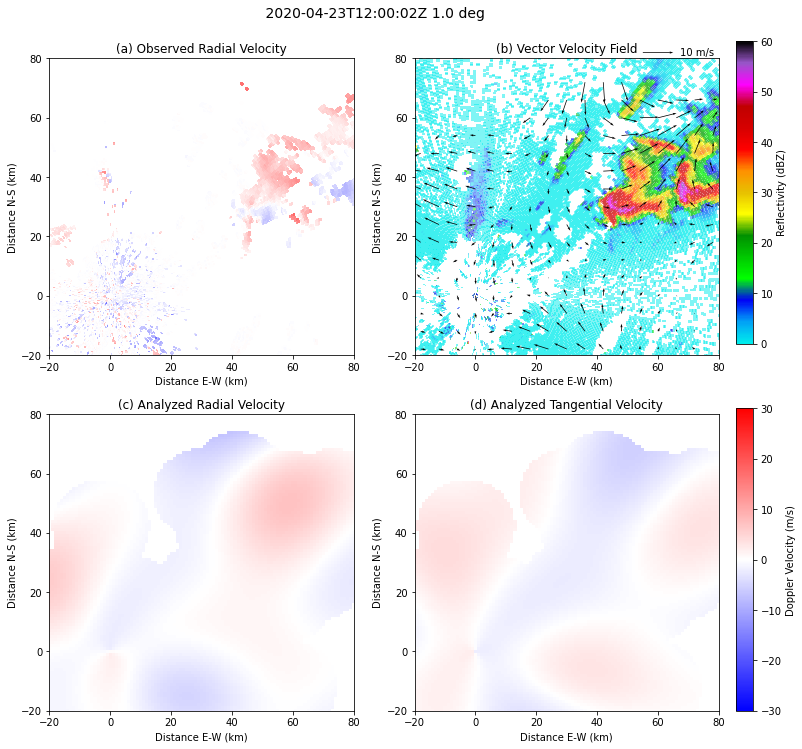

In [42]:
# เวลา 19.00 น. Time 1200UTC
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231200.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณลมด้วย singleDop พร้อมกับกรองข้อมูลด้วยการขจัดค่าการคำนวณได้ที่เกินจริงไปจากค่าตรวจวัดจริง
sd_test = singledop.SingleDoppler2D(L=30.0, radar=radar, range_limits=[0, 100], grid_edge=100.0,
                                    sweep_number=0, name_vr='corrected_velocity',
                                    thin_factor=[4, 12], filter_data=True,
                                    filter_distance=15)

#พลอตแบบพื้นที่ overview
display = singledop.AnalysisDisplay(sd_test)
display.four_panel_plot(scale=100, legend=10, return_flag=False, thin=6, xlim=[-20, 80], ylim=[-20, 80],
                        levels=-30.0+2.0*np.arange(31), name_vr='corrected_velocity', name_dz='corrected_reflectivity',
                        dz_cmap='pyart_NWSRef', dz_limits=[0, 60])


nyq:  8.38
268 total observations (M)


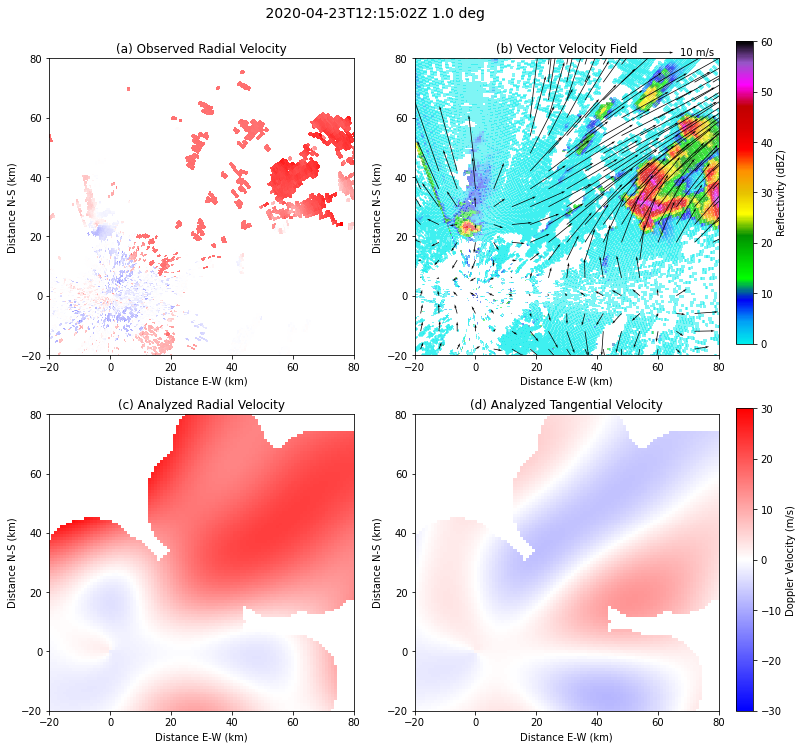

In [43]:
# เวลา 19.15 น. Time 1215UTC
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231215.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณลมด้วย singleDop พร้อมกับกรองข้อมูลด้วยการขจัดค่าการคำนวณได้ที่เกินจริงไปจากค่าตรวจวัดจริง
sd_test = singledop.SingleDoppler2D(L=30.0, radar=radar, range_limits=[0, 100], grid_edge=100.0,
                                    sweep_number=0, name_vr='corrected_velocity',
                                    thin_factor=[4, 12], filter_data=True,
                                    filter_distance=15)

#พลอตแบบพื้นที่ overview
display = singledop.AnalysisDisplay(sd_test)
display.four_panel_plot(scale=100, legend=10, return_flag=False, thin=6, xlim=[-20, 80], ylim=[-20, 80],
                        levels=-30.0+2.0*np.arange(31), name_vr='corrected_velocity', name_dz='corrected_reflectivity',
                        dz_cmap='pyart_NWSRef', dz_limits=[0, 60])


Strong winds and heavy rain as storm passes https://www.youtube.com/watch?v=nefKjH8Zrjg
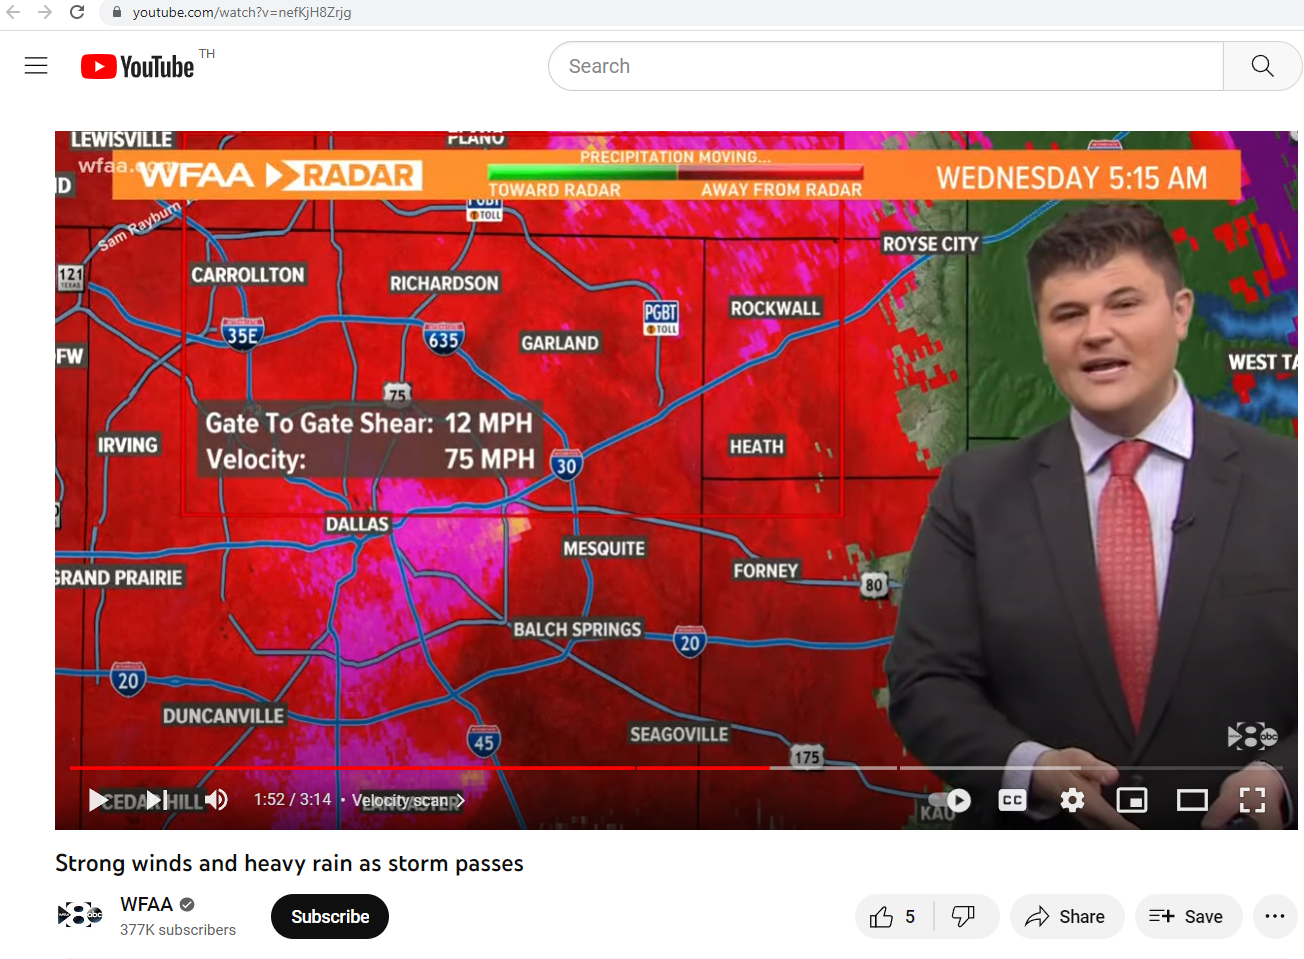

nyq:  8.38
303 total observations (M)


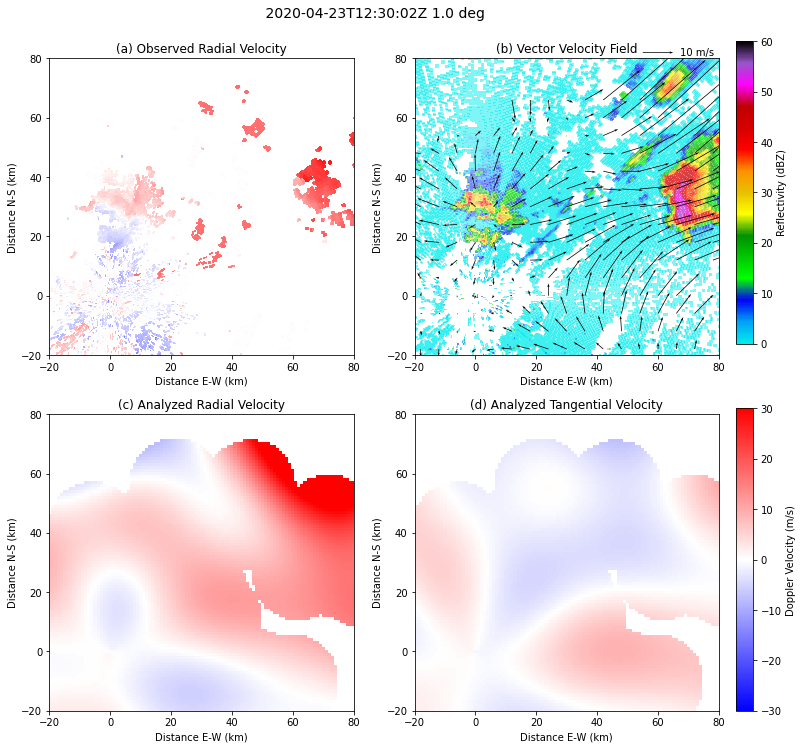

In [44]:
# เวลา 19.30 น. Time 1230UTC
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231230.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณลมด้วย singleDop พร้อมกับกรองข้อมูลด้วยการขจัดค่าการคำนวณได้ที่เกินจริงไปจากค่าตรวจวัดจริง
sd_test = singledop.SingleDoppler2D(L=30.0, radar=radar, range_limits=[0, 100], grid_edge=100.0,
                                    sweep_number=0, name_vr='corrected_velocity',
                                    thin_factor=[4, 12], filter_data=True,
                                    filter_distance=15)

#พลอตแบบพื้นที่ overview
display = singledop.AnalysisDisplay(sd_test)
display.four_panel_plot(scale=100, legend=10, return_flag=False, thin=6, xlim=[-20, 80], ylim=[-20, 80],
                        levels=-30.0+2.0*np.arange(31), name_vr='corrected_velocity', name_dz='corrected_reflectivity',
                        dz_cmap='pyart_NWSRef', dz_limits=[0, 60])


nyq:  8.38
277 total observations (M)


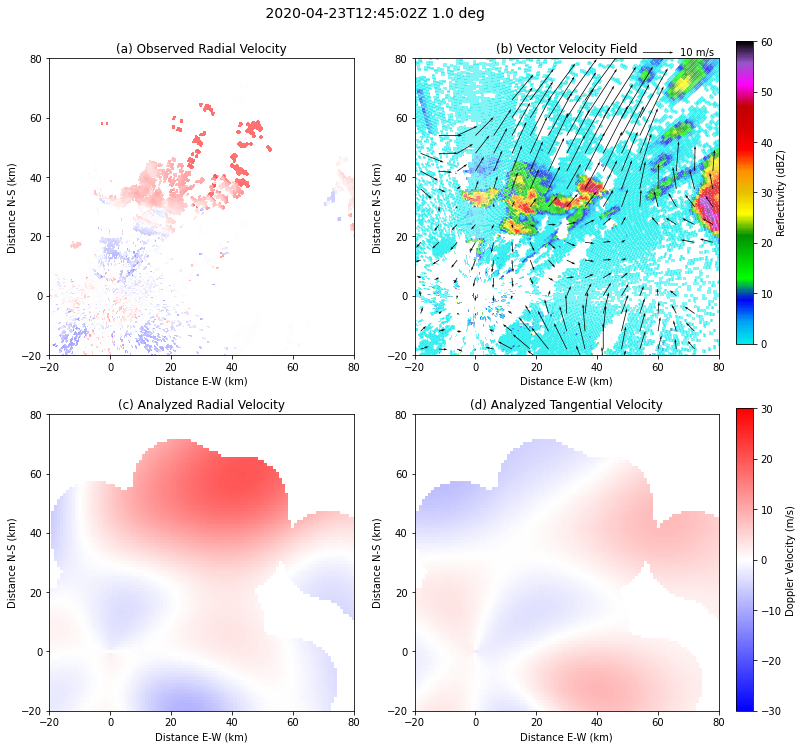

In [45]:
# เวลา 19.45 น. Time 1245UTC
# อ่านเรดาร์
radar = pyart.io.read( './0data/0Hail_CRI23Apr2020/CRI240@202004231245.uf')

#ปรับแก้ดอปเปลอร์
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
print('nyq: ', nyq)
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    nyquist_vel=nyq, centered = True)
radar.add_field('corrected_velocity', corr_vel, replace_existing = True)

#คำนวณลมด้วย singleDop พร้อมกับกรองข้อมูลด้วยการขจัดค่าการคำนวณได้ที่เกินจริงไปจากค่าตรวจวัดจริง
sd_test = singledop.SingleDoppler2D(L=30.0, radar=radar, range_limits=[0, 100], grid_edge=100.0,
                                    sweep_number=0, name_vr='corrected_velocity',
                                    thin_factor=[4, 12], filter_data=True,
                                    filter_distance=15)

#พลอตแบบพื้นที่ overview
display = singledop.AnalysisDisplay(sd_test)
display.four_panel_plot(scale=100, legend=10, return_flag=False, thin=6, xlim=[-20, 80], ylim=[-20, 80],
                        levels=-30.0+2.0*np.arange(31), name_vr='corrected_velocity', name_dz='corrected_reflectivity',
                        dz_cmap='pyart_NWSRef', dz_limits=[0, 60])
